# Home Assignment -- 2

In [85]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

# Part 2 (57 + 2 pt.): Ensemble methods

In this part you are asked to complete  several theoretical tasks as well as
a couple of practical challenges.

In [86]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Task 1 (8 pt.):  Some theory of Decision Trees

$$
\begin{aligned}
& R_m := \text{set of train objects at the node m} \\ 
& N_m := |R_m| \\
& p_{mk} = \frac{1}{N_m}\sum\limits_{(x_i, y_i)\in R_m}[y_i = k] \\
\end{aligned}
$$

### Task 1.1 (2 pt.)

Show that Gini Index can be written as

$$
\sum_{k\neq k'} p_{mk}p_{mk'}
    = ???
    = 1 - p_{m,k_m}, \text{ where } k_m = \arg\max\limits_{k}p_{mk}
$$

#### BEGIN Solution

$$
        \sum_{k \neq k'} p_{mk} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) = 1 - \sum_{k = 1}^{K} p_{mk}^2
$$

**END Solution**

<br/> <!--Intentionally left blank-->

### Task 1.2 (6 pt.)

In fact one could view the $K$-mutliclass classification tree as a **piecewise
constant vector function** $x\mapsto T(x)$, where
\begin{equation}
    T(x) = \sum_{m=1}^J p_m [x\in R_m] \,,
\end{equation}
where $[x\in R_m]$ returns $1$ if $x\in R_m$ and $0$ otherwise. Also $(R_m)_{m=1}^J$
is the *tree-partition* of the feature space, induced by the **CART** (or any other)
algorithm, and $p_m = (p_{mq})_{q=1}^K \in [0, 1]^K$ is the vector of the empirical
class probabilities, estimated on the training sample observations, that end up in
the region $R_j$.

For example, for any observed $x$ the vector $T(x)$ represents the estimated class
probabilities in the respective tree-leaf. **Note** that the regions in the partition
do **not overlap**, and $\sum_{k=1}^K p_{mk} = 1$ for any $m$! 

Consider a fixed test example $x$ with the true class class label $t\in \{1.. K\}$.
Let $j=1..J$ be some leaf of a tree $T$.

The **default** Decision Tree classifier, $\hat{y}(\cdot)$ **labels** all test
observations $x$, that fall in $R_j$, by the **same class label**, determined
by $\hat{y}(x) = \arg\max_{q=1..K} p_{mq}$.

Let's imagine an alternative rule that **assigns** a label to a test observation
$x$, falling in tree-region $R_m$, **by choosing a label at random** according
to the *estimated* distribution $p_m$:
$$ y(x)
    = \begin{cases}
        1\,, & \text{ with prob. } p_{m1} \,, \\
        \ldots & \\
        K\,, & \text{ with prob. } p_{mK} \,. \\
      \end{cases}
$$

Show that the **new labelling rule** does not improve the theoretical misclassification
error.

#### BEGIN Solution
$$
\begin{align}
\mathbb E\frac{1}{N_m} \sum_{x_i \in R_m} [y_i \neq y(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \mathbb E[y_i \neq y(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} (1 - p_{m,y_i})
=\\
=
\sum_{k = 1}^{K} \frac{\sum_{(x_i,\,y_i) \in R_m} [y_i = k]}{N_m} (1 - p_{mk})
=
\sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) \geq 1 - p_{mk_m}
= \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m]
\end{align}
$$
**END Solution**

<br/> <!--Intentionally left blank-->

#### Solution

<!-- // BEGIN Solution -->



<!-- END Solution -->

## Task 2 (11+2 pt.): Practice with Bootstrap and Trees

In this task you will be asked to make a couple of plots depicting the variance
of the predicted probability of class $1$ by some classification algorithm.

But first generate the toy [Crescent Moons dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

In [87]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)

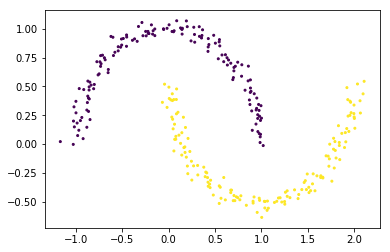

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=4)

### Task 2.1 (8+2 pt.)

You need to somehow estimate a function $x\mapsto \mathbb{V} T(x)$ for a class of
estimators $T$, defined by
$$ \mathbb{V} T(x) = \mathbb{V}_{S \sim D^m} T(x; S)
    \,, $$
where $T(x; S)$ means "classifier of class $T$ returned by a learning algorithm applied
to the training sample $S$ and evaluated at a point $x$". The notaion $S \sim D^m$ means
"a randomly drawn iid sample of size $m$ from the data distribution $D$". The key problem
is that you **never know** $D$ but you have a ready training sample $(X, y)$ from it...

Please, implement a **procedure** which uses **bootstrap** to construct an estimate of
$\mathbb{V} T(\cdot)$ on a fixed common test dataset for the provided classifier. Please
refer to **Seminar 5** for pictures, **explanation** and examples, and to **scikit's
API** documentation.

**Bonus** You will get an extra $+2$ pt. if instead of re-implementing everything
yourself, you figure out how to use sklearn's `BaggingClassifier`. You are in for a
certain feeling of satisfaction with how **clever** sklearn's API is!

In [89]:
from sklearn.ensemble import BaggingClassifier

def bootstrap_predictions(estimator, X, y, X_test, n_bootstrap=101):
    """Bootstrap a given classifier.
    
    Parameters
    ----------
    estimator : object
        A classifier instance with sklearn-compatible interface.

    X : array, shape = (n_samples, n_features)
        The X part of the full dataset.

    y : array, shape = (n_samples,)
        The target labels of the full dataset.

    X_test : array, shape(n_test_samples, n_features)
        The test data to measure theoutput of bootstrapped estimators on.

    n_bootstrap : int, nonnegative
        The number of bootstrap replication of `estimator` to make.

    Returns
    -------
    proba : array, shape=(n_test_samples, n_bootstrap), dtype=float
        The matrix of bootstrapped outputs of the classifier.

    bag : list
        The list of bootstrap replications of the classifier.

    Details
    -------
    The `(X, y)` full dataset is used to generate bootstrap samples. Each one
    of `n_bootstrap` samples is used to train a separate copy of the provided
    `estimator`. Each classifier form resulting set of bootstrapped estimators
    is applied to `X_test` and the output is recorded in `proba` array.
    """

    ### BEGIN Solution
    model = BaggingClassifier(base_estimator = estimator, n_estimators=n_bootstrap, random_state = 42)
    model.fit(X,y)
    output = np.empty((n_bootstrap, X_test.shape[0]), dtype = np.float64)
    for i, clf in enumerate(model.estimators_):
        output[i] = clf.predict_proba(X_test)[:,np.where(model.classes_==1)[0][0]]
    output = output.T
    #print (np.where(model.classes_==1)[0][0])
    bag = model.estimators_samples_ 
    ### END Solution

    return output, bag

### Task 2.2 (3 pt.)

Define a regular $2$-D mesh $51 \times 51$ that **covers the box**, within which
the original dataset resides.

In [90]:
def expand(a, b, factor=0.2):
    """Make a wider interval defined by the endpoints."""
    return a - abs(a) * factor, b + abs(b) * factor

X_l, X_h = X.min(axis=0), X.max(axis=0)
xx0, xx1 = np.meshgrid(np.linspace(*expand(X_l[0], X_h[0]), num=51),
                       np.linspace(*expand(X_l[1], X_h[1]), num=51))

X_grid = np.c_[xx0.ravel(), xx1.ravel()]

Plot the bootstrap estimate ($101$ replications) of the variance of the predicted
probability of class $1$ at each point of the $2$-d grid. As the base classifiers
use the **Decision Tree Classifier** with different settings for `min_samples_leaf`
* $3$, $10$, $75$.

You must create three separate contour plots. Make sure to properly label your
axes and provide meaningful titles for each [subplot](https://matplotlib.org/api/axes_api.html#axis-labels-title-and-legend).

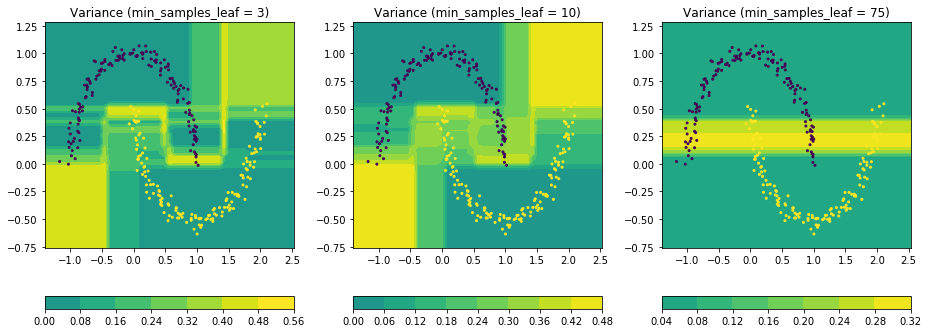

In [91]:
from sklearn.tree import DecisionTreeClassifier

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 5))
for ax, min_samples_leaf in zip(axes, [3, 10, 75]):
    ### BEGIN Solution
    
    estimator = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    proba, bug = bootstrap_predictions(estimator, X, y , X_grid)
    std = np.std(proba, axis = 1).reshape(xx0.shape[0], xx1.shape[0])
    cont = ax.contourf(xx0,xx1,std, norm = plt.Normalize(vmax=abs(std).max(), vmin=-abs(std).max()))
    plt.colorbar(cont, orientation = 'horizontal', ax=ax)
    ax.set_title("Variance (min_samples_leaf = {})".format(min_samples_leaf))
    ### END Solution

    ax.scatter(X[:, 0], X[:, 1], c=y, s=4)
    
plt.tight_layout()

<br/> <!--Intentionally left blank-->

## Task 3 (20 pt.):  Boosting and its theory

Minimization of a loss function is an optimization task, and "Gradient Boosting"
is one of the many methods to perform optimization. It shoould be noted that it
uses **greedy** approach and thus, like greedy algorithms in CS, may produce
results that are not *globally* optimal.

$$
\begin{aligned}
    & b_n(x) := \text{the best base model from the family of the algorithms $\mathcal{A}$} \\
    & \gamma_n(x) := \text{scale or weight of the new model} \\
    & a_N(x) = \sum_{n=0}^N \gamma_n b_n(x) := \text{the final composite model}
\end{aligned}
$$

### Gradient Boosting Algorithm

Consider a loss loss function $L(y, z)$ for target $y$ and prediction $z$, and let
$(x_i, y_i)_{i=1}^l$ be out train dataset for a regression task. 


1. Initialize $a_0(x) = \hat{z}$ with the **flat constant prediction**
$\hat{z} = \arg\min\limits_{z \in \mathbb{R}} \sum_{i=1}^l L(y_i, z)$;
2. For $n$ from `1` to `n_boost_steps` do:
    * Solve the current subporblem $G_n(b_n, \gamma_n) \to \min\limits_{b_{n}, \gamma_n}$
    where 
    $$ G_n(b, \gamma) = \sum_{i=1}^l L\bigl(y_i, a_{n-1}(x_i) + \gamma b(x_i)\bigr) $$
    with the following method:
    \begin{align}
      & s_i = - \frac{\partial}{\partial z} L(y_i, z) \Big\vert_{z=a_{n-1}(x_i)}
          \\
      & b_n(x) = \arg\min\limits_{b\in\mathcal{A}}\sum_{i=1}^l \bigl(b(x_i) - s_i\bigr)^2
          \\
      & \gamma_n = \arg\min_\gamma G_n(b_n, \gamma)
          \\
      & a_n(x) = a_{n-1}(x) + \gamma_n b_n(x)
    \end{align}
3. return $a_N(x) = a_0(x) + \sum_{n=1}^N \gamma_n b_n(x)$

### Task 3.1  (2 pt.)

Consider the *logistic loss* for classification task $L(y,z) = \log\bigl(1 + e^{-y z}\bigr)$,
where $y \in \{-1, +1\}$. Derive the **gradient** for it with respect to $z$.

#### BEGIN Solution

$$
\begin{align}
\nabla L(y,z) = \left( \frac{\partial L(y_1,z_1)}{\partial z_1},\dots, \frac{\partial L(y_l,z_l)}{\partial z_l} \right)
\end{align}
\\
\frac{\partial L(y_i,z_i)}{\partial z_i} = \frac{1}{1+e^{-y_i z_i}} * e^{-y_i z_i} *(-y_i) = - \frac{y_i e^{-y_i z_i}}{1+e^{-y_i z_i}}
$$
**END Solution**

<br/> <!--Intentionally left blank-->

### Task 3.2 (3 pt.)

At the $n$-th step of Garient Boosting ($n \geq 1$ we compute the "residuals"
$(s_i)_{i=1}^l$ and learn $x\mapsto b_n(x)$ with a regression algorithm $\mathcal{A}$
applied to the dataset $(x_i, s_i)_{i=1}^l$. For the next two tasks **assume
that we have already perfomed these substeps**.

Derive the **optimal value** of $\gamma_n$ for *MSE* loss function $L(y, z) = \tfrac12 (y - z)^2$.

#### BEGIN Solution

$$
\begin{align}
\gamma_n = arg \min_{\gamma \in \mathbb{R}} \sum_{i=1}^lL(y_i, a_{n-1}(x_i) + \gamma b_n (x_i)) = arg \min_{\gamma \in \mathbb{R}} \frac{1}{2} \sum_{i=1}^l (y_i - (a_{n-1}(x_i) + \gamma b_n (x_i)))^2 \\= arg \min_{\gamma \in \mathbb{R}} \sum_{i=1}^l (s_i - \gamma b_n (x_i)))^2
\end{align}
$$

$$
\frac{\partial \left( \sum_{i=1}^l (s_i - \gamma b_n (x_i)))^2 \right)} {\partial \gamma} = \sum_{i=1}^l \frac{\partial (s_i - \gamma b_n(x_i)))^2}{\partial \gamma} = \sum_{i=1}^l (s_i - \gamma b_n (x_i))(-b_n(x_i)) =\\ \gamma \sum_{i=1}^l b_n (x_i)^2 - \sum_{i=1}^l s_i b_n(x_i) = 0 \quad \Rightarrow \quad \gamma = \frac{\sum_{i=1}^l s_i b_n(x_i)}{\sum_{i=1}^l b_n(x_i)^2}
$$




**END Solution**

<br/> <!--Intentionally left blank-->

### Task 3.3 (15 pt.)

Let $S = (x_i, y_i)_{i=1}^l$ be a sample for a classification task $y_i \in \{-1, +1\}$.

The **AdaBoost** algorithm can be regarded as a gradient boosting algorithm
with the exponential loss $L(y,z) = e^{-y z}$. Consdier the state of **AdaBoost**
at the $(T-1)$-step
$$ G_{T-1}(b_T, \gamma_T)
    = \sum_{i=1}^l L\bigl(y_i, a_{n-1}(x_i) + \gamma b(x_i)\bigr)
    = \sum_{i=1}^l \underbrace{\exp(- y_i a_{T-1}(x_i))}_{w^{T-1}_i}
        \exp(- y_i \gamma_T b_T(x_i))
    \,.
$$

#### Task 3.3.1 (4 pt.)

Derive the next weights $w^T_i$ used in $G_T$ at the stage $T$ as a function
of the learnt classifier $b_T$ and the current weights $w^{T-1}_i$;

#### BEGIN Solution



**END Solution**

<br/> <!--Intentionally left blank-->

#### Task 3.3.2 (9 pt.)

Compute the ratio of weights $(w^T_i)_{i=1}^l$ between the normal and outlier
samples in $S$. Propose a **formal definition of being an outlier**, and reflect
on the value of *margin* for both.

#### BEGIN Solution



**END Solution**

<br/> <!--Intentionally left blank-->

#### Task 3.3.2 (2 pt.)

Conclude about **sensitivity** of Adaboost to outliers.

#### BEGIN Solution



**END Solution**

<br/> <!--Intentionally left blank-->

## Task 4 (18 pt.): Practical Boosting

In this task you are asked to implement a boosting algorithm, compare speed of
different popular boosting libraries, and use boosting to measure feature importance.

### Task 4.1 (9 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [92]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. **(5 pt.)** Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **(2 pt.)** **Plot the decision boundary** on a $2$-d grid;
3. **(2 pt.)** Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to the 6th seminar.

In [93]:
### BEGIN Solution


### END Solution

<br/> <!--Intentionally left blank-->

### Task 4.2 (9 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. **(3 pt.)** take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. **(6 pt.)** use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [95]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
#Default
clf_xgb = XGBClassifier()
clf_cat = CatBoostClassifier(logging_level='Silent')
clf_lgbm = LGBMClassifier()

In [96]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
CatBoostClassifier()

In [98]:
LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [99]:
%timeit clf_xgb.fit(X_train, y_train)
%timeit clf_cat.fit(X_train, y_train)
%timeit clf_lgbm.fit(X_train, y_train)

49.8 ms ± 722 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.82 s ± 299 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
61.9 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
predictions_xgb = clf_xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, predictions_xgb)

predictions_cat = clf_cat.predict_proba(X_test)[:,1]
fpr_cat, tpr_cat, _ = roc_curve(y_test, predictions_cat)

predictions_lgbm = clf_lgbm.predict_proba(X_test)[:,1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, predictions_lgbm)

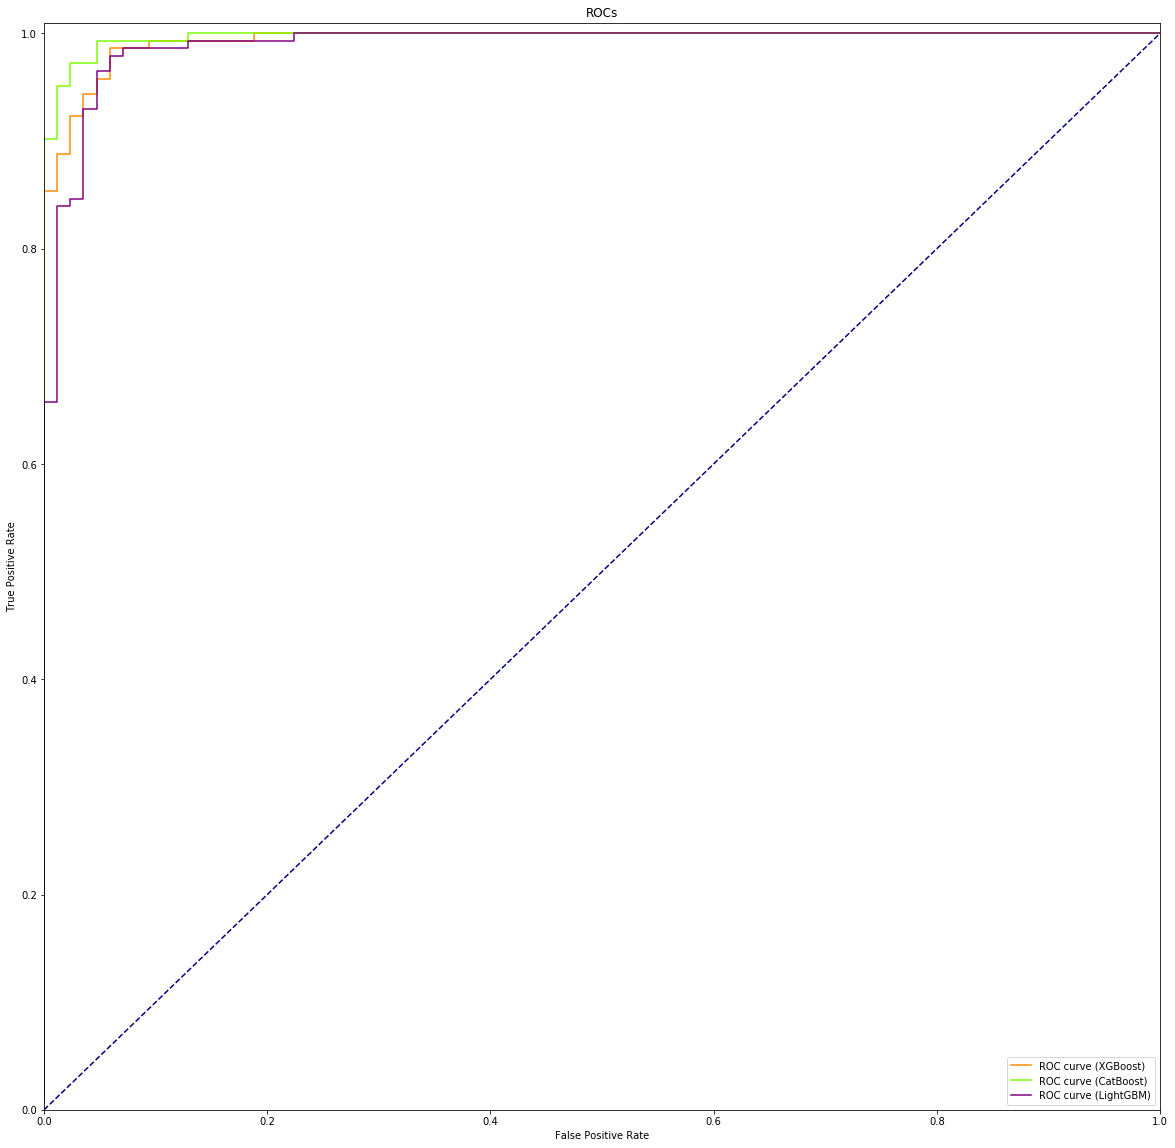

In [101]:
plt.figure(figsize = (20,20))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', label='ROC curve (XGBoost)' )
plt.plot(fpr_cat, tpr_cat, color='lawngreen', label='ROC curve (CatBoost)')
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', label='ROC curve (LightGBM)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROCs')
plt.legend(loc="lower right")
plt.show()

<b> GridSearch </b>

In [102]:
from sklearn.model_selection import GridSearchCV


In [103]:
%%timeit
params_xgb = [ {'max_depth': np.arange(1,10), 
            'n_estimators' : [50,100, 200],
            'gamma': np.linspace(1e-3, 1e3, 10)}]
clf_1 = GridSearchCV(clf_xgb,param_grid = params_xgb, cv=3)
clf_1.fit(X_train, y_train)
best_xgb = clf_1.best_estimator_            

In [104]:
params_cat = {'depth': np.arange(1,10), 
                'iterations' : [50, 100, 200],
                'l2_leaf_reg': np.linspace(1e-3, 1e3, 10)}
clf_2 = GridSearchCV(clf_cat,param_grid = params_cat, cv=3)
clf_2.fit(X_train, y_train)
best_cat = clf_2.best_estimator_

TypeError: Object of type 'int64' is not JSON serializable

In [106]:
%%timeit
params_lgbm = [ {'max_depth': np.arange(1,10), 
                'n_estimators' : [50, 100, 200],
                'reg_lambda': np.linspace(1e-3, 1e3, 10)}]
clf_3 = GridSearchCV(clf_lgbm,param_grid = params_lgbm, cv=3)
clf_3.fit(X_train, y_train)
best_lgbm = clf_3.best_estimator_

20.2 s ± 1.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
predictions_xgb = best_xgb.predict_proba(X_test)[:,1]
fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_test, predictions_xgb)

#predictions_cat = best_cat.predict_proba(X_test)[:,1]
#fpr_cat_best, tpr_cat_best, _ = roc_curve(y_test, predictions_cat)

predictions_lgbm = best_lgbm.predict_proba(X_test)[:,1]
fpr_lgbm_best, tpr_lgbm_best, _ = roc_curve(y_test, predictions_lgbm)

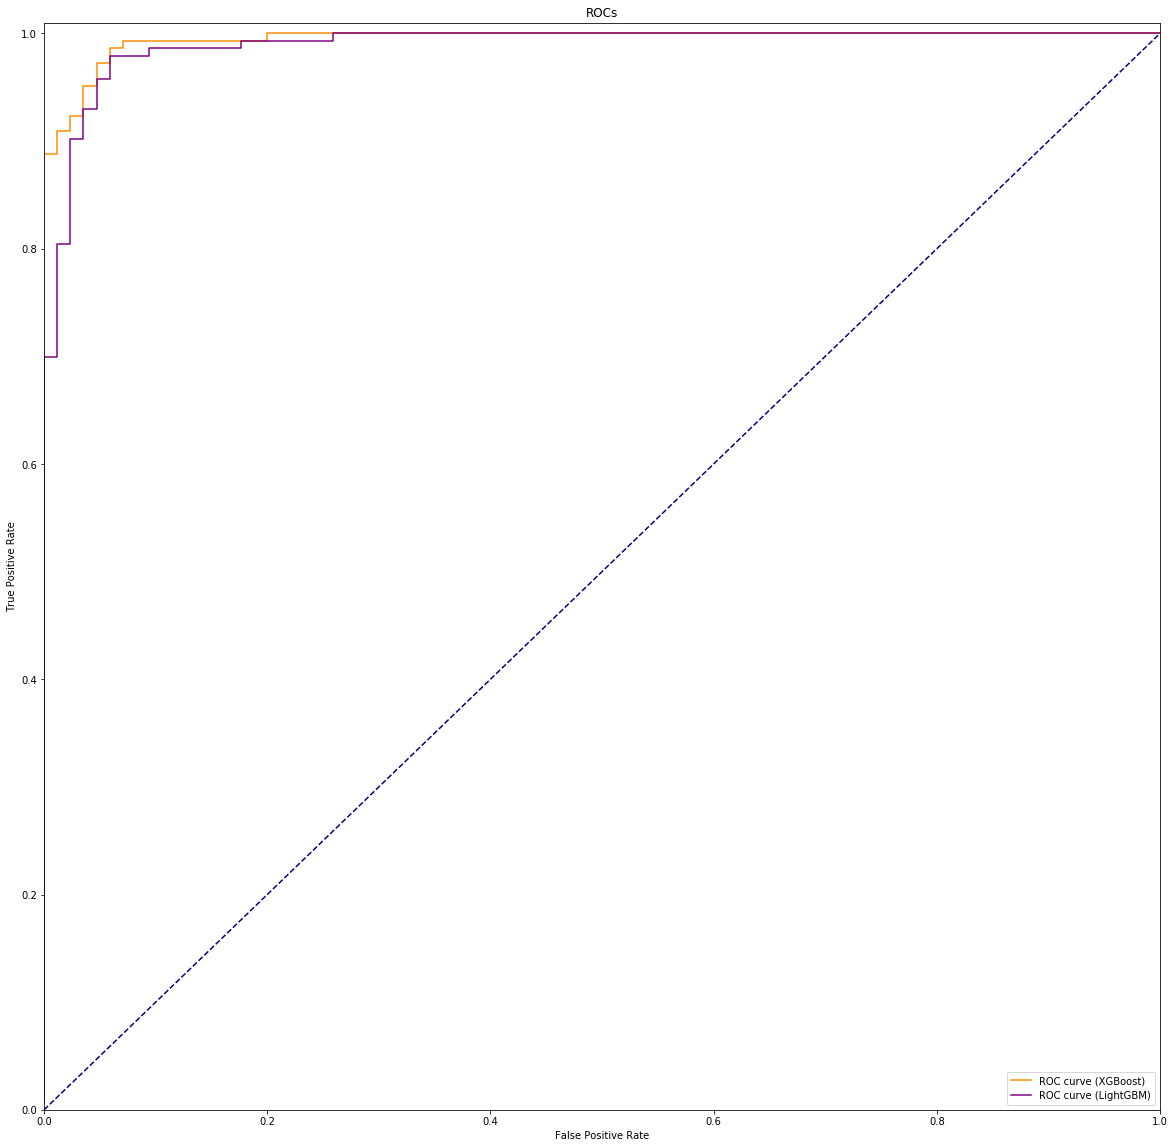

In [108]:
plt.figure(figsize = (20,20))
plt.plot(fpr_xgb_best, tpr_xgb_best, color='darkorange', label='ROC curve (XGBoost)' )
#plt.plot(fpr_cat, tpr_cat, color='lawngreen', label='ROC curve (CatBoost)')
plt.plot(fpr_lgbm_best, tpr_lgbm_best, color='purple', label='ROC curve (LightGBM)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROCs')
plt.legend(loc="lower right")
plt.show()